In [1]:
import math
import random
import itertools
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Question 1

In [2]:
data = pd.read_csv('dataset-assignment.csv', sep=';');

In [3]:
data

,A,T,S,R,H,F,Q,P,D,L,X,W,C,V
0,7.0,170.0,0.45,20.70,0.045,45.0,6,3.00,1.00100,8.800000,1.00,0.20,0.36,0.270
1,6.3,132.0,0.49,1.60,0.049,14.0,6,3.30,0.99400,9.500000,0.17,0.71,0.34,0.300
2,8.1,97.0,0.44,6.90,0.050,30.0,6,3.26,0.99510,10.100000,0.13,0.93,0.40,0.280
3,7.2,186.0,0.40,8.50,0.058,47.0,6,3.19,0.99560,9.900000,0.14,0.30,0.32,0.230
4,7.2,186.0,0.40,8.50,0.058,47.0,6,3.19,0.99560,9.900000,0.17,0.66,0.32,0.230
5,8.1,97.0,0.44,6.90,0.050,30.0,6,3.26,0.99510,10.100000,0.13,0.56,0.40,0.280
6,6.2,136.0,0.47,7.00,0.045,30.0,6,3.18,0.99490,9.600000,0.20,0.98,0.16,0.320
7,7.0,170.0,0.45,20.70,0.045,45.0,6,3.00,1.00100,8.800000,0.25,0.55,0.36,0.270
8,6.3,132.0,0.49,1.60,0.049,14.0,6,3.30,0.99400,9.500000,0.10,0.29,0.34,0.300
9,8.1,129.0,0.45,1.50,0.044,28.0,6,3.22,0.99380,11.000000,0.20,0.40,0.43,0.220


### Check if any value is NaaN or null:

In [4]:
data.isnull().any().any()

False

### Show descriptive statistics for data


In [5]:
statistics = data.describe()
statistics

,A,T,S,R,H,F,Q,P,D,L,X,W,C,V
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,138.360657,0.489847,6.391415,0.045772,35.308085,5.877909,3.188267,0.994027,10.514267,0.287717,0.506831,0.334192,0.278241
std,0.843868,42.498065,0.114126,5.072058,0.021848,17.007137,0.885639,0.151001,0.002991,1.230621,0.255864,0.290825,0.121020,0.100795
min,3.800000,9.000000,0.220000,0.600000,0.009000,2.000000,3.000000,2.720000,0.987110,8.000000,0.100000,0.000000,0.000000,0.080000
25%,6.300000,108.000000,0.410000,1.700000,0.036000,23.000000,5.000000,3.090000,0.991723,9.500000,0.130000,0.260000,0.270000,0.210000
50%,6.800000,134.000000,0.470000,5.200000,0.043000,34.000000,6.000000,3.180000,0.993740,10.400000,0.200000,0.510000,0.320000,0.260000
75%,7.300000,167.000000,0.550000,9.900000,0.050000,46.000000,6.000000,3.280000,0.996100,11.400000,0.330000,0.760000,0.390000,0.320000
max,14.200000,440.000000,1.080000,65.800000,0.346000,289.000000,9.000000,3.820000,1.038980,14.200000,1.000000,1.000000,1.660000,1.100000


### Boxplot and frequency histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A21A419E8>]],
      dtype=object)

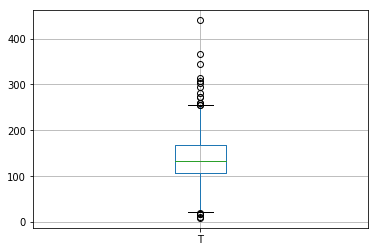

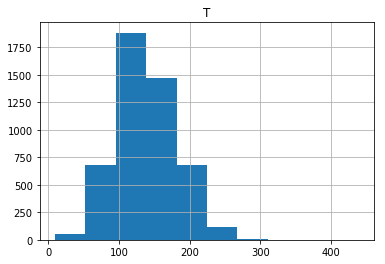

In [6]:
column = 'T'
data.boxplot(column)
data.hist(column)

### Correlation matrix

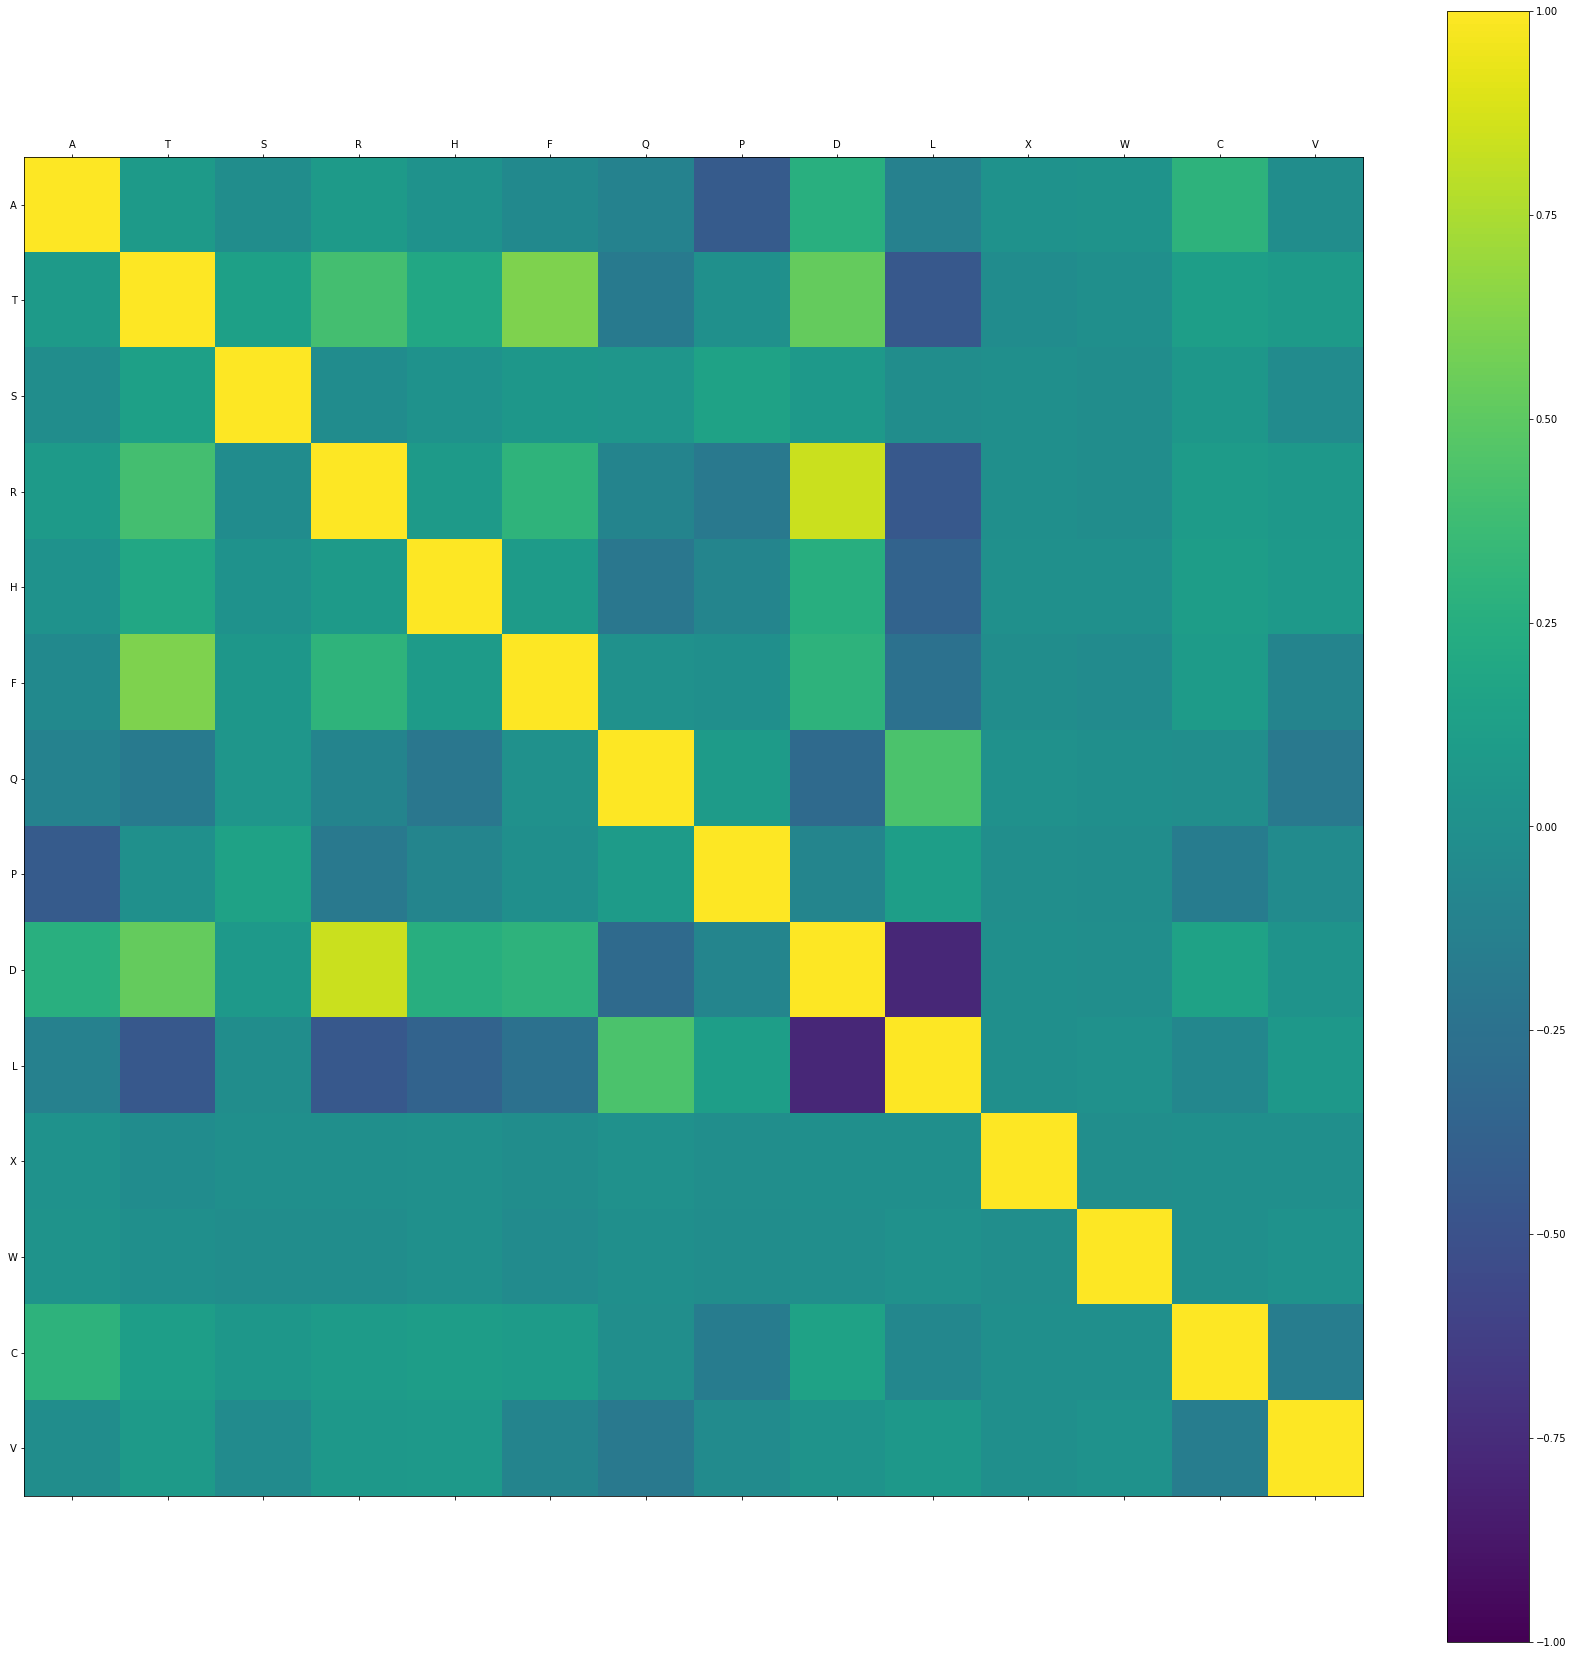

In [7]:
data_corr = data.corr()

names = list(data_corr.columns)
fig = plt.figure(figsize=[30,30])
ax = fig.add_subplot(111)
cax = ax.matshow(data_corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,data_corr.shape[1],1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

### Scatterplots of most corelated pairs

1. L with D
2. D with R
3. F with T

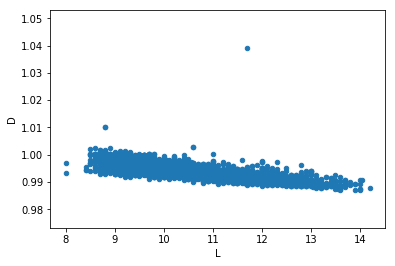

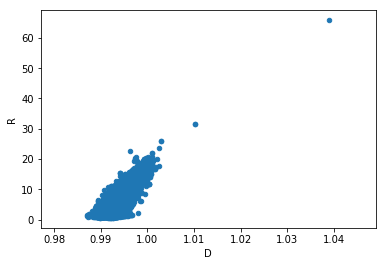

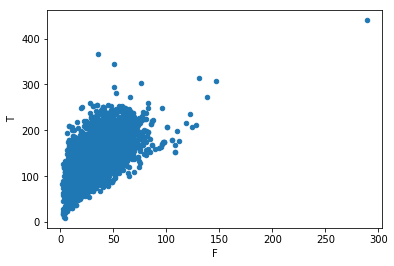

In [8]:
data.plot.scatter(x='L', y='D')
data.plot.scatter(x='D', y='R')
data.plot.scatter(x='F', y='T')

In [9]:
max_corr = data_corr.copy()
max_corr[max_corr==1] = 0
max_corr[abs(max_corr)  < 0.4] = 0
max_corr

,A,T,S,R,H,F,Q,P,D,L,X,W,C,V
A,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.425858,0.000000,0.000000,0.0,0.0,0.0,0.0
T,0.000000,0.000000,0.0,0.401439,0.0,0.615501,0.000000,0.000000,0.529881,-0.448892,0.0,0.0,0.0,0.0
S,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
R,0.000000,0.401439,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.838966,-0.450631,0.0,0.0,0.0,0.0
H,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
F,0.000000,0.615501,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
Q,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.435575,0.0,0.0,0.0,0.0
P,-0.425858,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
D,0.000000,0.529881,0.0,0.838966,0.0,0.000000,0.000000,0.000000,0.000000,-0.780138,0.0,0.0,0.0,0.0
L,0.000000,-0.448892,0.0,-0.450631,0.0,0.000000,0.435575,0.000000,-0.780138,0.000000,0.0,0.0,0.0,0.0


From correlation matrix we can see that most correleted variables are:
1. D and R with 0.8389668
2. D and L with -0.78013
3. F and T with 0.615501

# Question 2
### Sample mean and sample standard deviation

In [10]:
print(len(data))
mean_and_dev  = statistics.loc[['mean', 'std']]
mean_and_dev

4898


,A,T,S,R,H,F,Q,P,D,L,X,W,C,V
mean,6.854788,138.360657,0.489847,6.391415,0.045772,35.308085,5.877909,3.188267,0.994027,10.514267,0.287717,0.506831,0.334192,0.278241
std,0.843868,42.498065,0.114126,5.072058,0.021848,17.007137,0.885639,0.151001,0.002991,1.230621,0.255864,0.290825,0.121020,0.100795


# Question 3
### Confidence intervals function

In [11]:

def confidence_interval(alpha, variable):
    return st.t.interval(1-alpha, len(variable)-1, 
                         loc=np.mean(variable), scale=st.sem(variable))

# Question 4
### Confidence intervals for all variables

In [12]:
a1 = 0.05
a2 = 0.01

conf_a1 = pd.DataFrame()
conf_a2 = pd.DataFrame()
for col in data.columns:
    conf_a1[col] = (list(confidence_interval(a1, data[col])))
    conf_a2[col] = (list(confidence_interval(a2, data[col])))
conf_a1 = conf_a1.rename({0:"lower bound", 1:"upper bound"})
conf_a2 = conf_a2.rename({0:"lower bound", 1:"upper bound"}) 
print('With alpha = ' + str(a1))
display(conf_a1)
print('With alpha = ' + str(a2))
display(conf_a2)

With alpha = 0.05


,A,T,S,R,H,F,Q,P,D,L,X,W,C,V
lower bound,6.831149,137.170196,0.486650,6.249336,0.045160,34.831679,5.853101,3.184037,0.993944,10.479795,0.280550,0.498685,0.330801,0.275418
upper bound,6.878426,139.551119,0.493044,6.533494,0.046384,35.784491,5.902718,3.192496,0.994111,10.548739,0.294885,0.514978,0.337582,0.281065


With alpha = 0.01


,A,T,S,R,H,F,Q,P,D,L,X,W,C,V
lower bound,6.823717,136.795903,0.485645,6.204665,0.044968,34.681892,5.845301,3.182707,0.993917,10.468956,0.278297,0.496123,0.329736,0.274530
upper bound,6.885858,139.925412,0.494049,6.578165,0.046577,35.934278,5.910518,3.193826,0.994137,10.559578,0.297138,0.517539,0.338647,0.281952


Computation was also checked with https://www.mathsisfun.com/data/confidence-interval-calculator.html

For example variable T, we get same results
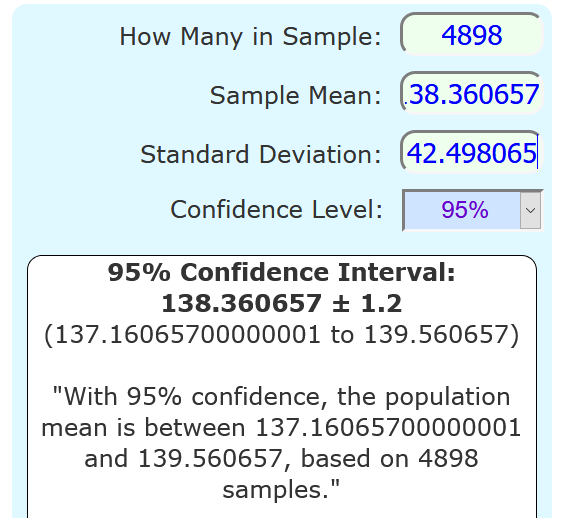

# Question 5
### Empirical confidence interval

In [13]:
variation_coefficients_dataset = pd.DataFrame(columns=mean_and_dev.columns, 
                                                index=['variation_coefficients'])
for col in mean_and_dev.columns:
    variation_coefficients_dataset[col][0] = mean_and_dev[col]['std']/mean_and_dev[col]['mean']*100
display(variation_coefficients_dataset)

,A,T,S,R,H,F,Q,P,D,L,X,W,C,V
variation_coefficients,12.3106,30.7154,23.2983,79.3574,47.7318,48.1678,15.0672,4.73613,0.300888,11.7043,88.9291,57.381,36.2127,36.2256


We see that variable X has largest variation coefficient  88.9291

### Resample data for variable X

In [14]:
num_samples = len(data['X'])
resample = []

random.seed(1345)
for _ in range(num_samples):
    resample.append(data['X'][random.randint(0,num_samples-1)])
print(len(resample))
resample.sort()
resampled_x = pd.DataFrame({'X':resample})
display(resampled_x.describe())
print('Empirical confidence interval for mean:' + str(confidence_interval(0.01, resampled_x['X'])))

z_99 = 2.576
lower_bound_median_ind = round(num_samples/2 - (z_99 * math.sqrt(num_samples)) / 2)
upper_bound_median_ind = round(1 + num_samples/2 + (z_99 * math.sqrt(num_samples)) / 2)

print('Empirical confidence interval for median: ('
      +str(resampled_x['X'][lower_bound_median_ind])+', '
      +str(resampled_x['X'][upper_bound_median_ind])+')')
print('Median: ' + str(resampled_x.median()[0]))

4898


,X
count,4898.000000
mean,0.283277
std,0.251884
min,0.100000
25%,0.130000
50%,0.170000
75%,0.330000
max,1.000000


Empirical confidence interval for mean:(0.2740026200479498, 0.29255107533792196)
Empirical confidence interval for median: (0.17, 0.2)
Median: 0.17


# Question 6
### Null hipothesis

In [15]:
sample_median = data['X'].median()
print("Sample median: " + str(sample_median))

(confidence_lower, confidence_upper) = confidence_interval(0.01, resampled_x['X'])
print("Estimated population mean with confidence 0.99: ")
print(str(confidence_lower) + "," + str(confidence_upper))
print("Mean is not same as median for variable X")

Sample median: 0.2
Estimated population mean with confidence 0.99: 
0.2740026200479498,0.29255107533792196
Mean is not same as median for variable X


# Question 7

### PCA

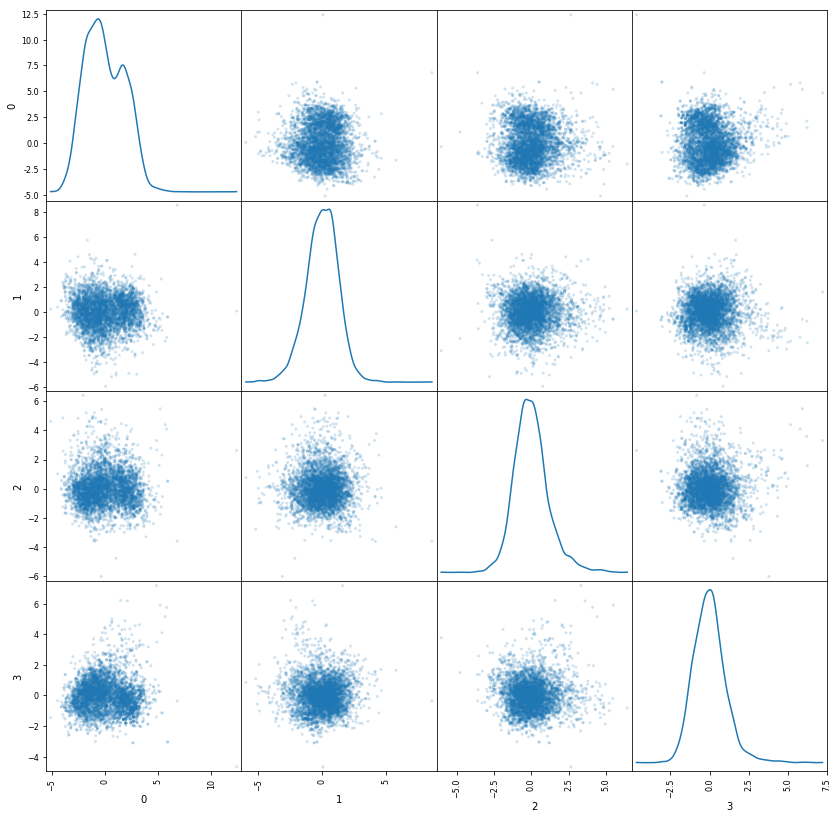

In [19]:

standardized_values = StandardScaler().fit_transform(data.values)
standarized_data = pd.DataFrame(standardized_values, index=data.index, columns=data.columns)

pca = PCA()
principal_data = pd.DataFrame(pca.fit_transform(standardized_values))

# Select only first 4 components
# kde = kernel density estimation
pd.plotting.scatter_matrix(principal_data[[0,1,2,3]], alpha = 0.2, figsize = (14,14), diagonal='kde');
plt.show()

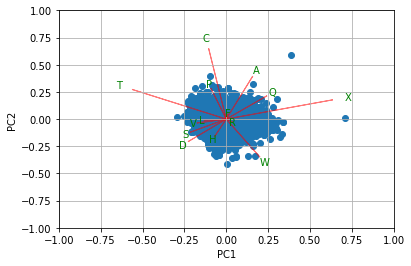

In [102]:
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5) 
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
    
biplot(pca.fit_transform(standardized_values), pca.components_, 1, 2, labels=data.columns)

In [103]:
pca_variances = pca.explained_variance_ratio_
for i in range(1, len(pca_variances)):
    print('First ' + str(i) +' PCA components have: ' + str(sum(pca_variances[0:i])) + '% variance')

pd.DataFrame(pca.components_,columns=data.columns)

First 1 PCA components have: 0.23907584139159302% variance
First 2 PCA components have: 0.352703953952769% variance
First 3 PCA components have: 0.4507288440515211% variance
First 4 PCA components have: 0.528219644166196% variance
First 5 PCA components have: 0.6009317547252931% variance
First 6 PCA components have: 0.6712947742845425% variance
First 7 PCA components have: 0.7406350484985005% variance
First 8 PCA components have: 0.8075053940194126% variance
First 9 PCA components have: 0.8624101047266807% variance
First 10 PCA components have: 0.9140923488689837% variance
First 11 PCA components have: 0.9537742319593426% variance
First 12 PCA components have: 0.9782563566085525% variance
First 13 PCA components have: 0.9985389043172208% variance


,A,T,S,R,H,F,Q,P,D,L,X,W,C,V
0,0.156641,0.390496,0.033768,0.406067,0.217469,0.274892,-0.227049,-0.129840,0.501254,-0.442722,-0.007132,-0.010768,0.132917,0.024203
1,-0.558199,0.270923,0.249023,0.038901,-0.039097,0.346582,0.148830,0.564130,0.016617,-0.014683,-0.044917,-0.076034,-0.284141,-0.020523
2,-0.212897,-0.119686,-0.223590,-0.033782,0.214102,-0.307833,-0.486003,0.075531,0.032245,-0.158987,0.006240,0.054829,-0.449459,0.524725
3,0.033350,-0.022285,0.519277,-0.415689,0.509715,-0.149402,-0.277929,0.204537,-0.103386,-0.134971,0.010890,-0.002631,0.329015,-0.132107
4,-0.068732,-0.158370,-0.071731,0.069365,0.021182,-0.119806,-0.004596,0.042266,0.077533,-0.118095,0.707408,-0.611172,-0.059004,-0.215015
5,0.009706,0.044489,0.079233,0.016091,-0.026276,0.021399,0.065091,0.053793,0.022483,0.001157,0.656724,0.741598,-0.035950,0.007580
6,0.240348,0.211487,0.486522,0.025399,-0.205433,0.042584,0.039326,-0.094885,-0.035674,0.276606,0.183551,-0.239991,0.042978,0.659298
7,-0.090207,0.279775,-0.437326,-0.280256,0.398137,0.485190,0.015662,-0.199391,-0.323405,0.152892,0.169266,-0.085449,0.128602,0.171489
8,-0.224713,-0.204641,0.042099,0.340047,0.548692,-0.227821,0.582571,-0.072110,0.125246,0.097367,-0.043941,0.022238,0.125629,0.222019
9,-0.127643,-0.009957,-0.336938,0.110039,-0.214419,-0.125555,-0.147101,0.479919,0.085526,0.088320,0.034868,0.007484,0.689554,0.228909


We see that first four PCA components add up to **52%** of total variance.

From correlation matrix we know that highest colinearity is between:<br>
1.**D** and **R**<br>
2.**D** and **L**<br>
3.**F** and **T**

From PCA component matrix we see that:<br>
1.First PCA component is mostly influenced by **D** and **R**.<br>
2.Second PCA component is mostly influenced by **P**.<br>
3.Third PCA component is mostly influenced by **V** and **Q**.<br>
4.Fourth PCA component is mostly influenced by **S** and **H**.<br>

# Question 8
### K-means

In [104]:
silhouette_avg_array = []
silhouette_sample_array = []
silhouette_labels_array = []
data_kmeans = standardized_values

for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=3123256995)
    labels = kmeans.fit_predict(data_kmeans)
    centroids = kmeans.cluster_centers_
    
    silhouette_avg = silhouette_score(data_kmeans, labels)
    sample_silhouette_values = silhouette_samples(data_kmeans, labels)
    
    print("Silhuette score for " + str(i) + " clusters: " + str(silhouette_avg))
    silhouette_avg_array.append(silhouette_avg)
    silhouette_sample_array.append(sample_silhouette_values)
    silhouette_labels_array.append(labels)

print("Best number of clusters " + str(silhouette_avg_array.index(max(silhouette_avg_array))+2))
print(max(silhouette_avg_array))

Silhuette score for 2 clusters: 0.17216424408743777
Silhuette score for 3 clusters: 0.12080207135235611
Silhuette score for 4 clusters: 0.1290666801902731
Silhuette score for 5 clusters: 0.11377584755137603
Silhuette score for 6 clusters: 0.11885483809663755
Silhuette score for 7 clusters: 0.1196717136999622
Silhuette score for 8 clusters: 0.1024859264618988
Silhuette score for 9 clusters: 0.10444330046611595
Silhuette score for 10 clusters: 0.10360134663059892
Silhuette score for 11 clusters: 0.10605330429437473
Silhuette score for 12 clusters: 0.09921948926618342
Silhuette score for 13 clusters: 0.09311448637136702
Silhuette score for 14 clusters: 0.0901686690474603
Silhuette score for 15 clusters: 0.09290808753136827
Silhuette score for 16 clusters: 0.08869508081503819
Silhuette score for 17 clusters: 0.09046356938919228
Silhuette score for 18 clusters: 0.0882481191588257
Silhuette score for 19 clusters: 0.08837119753974887
Silhuette score for 20 clusters: 0.08842339722115328
Best n

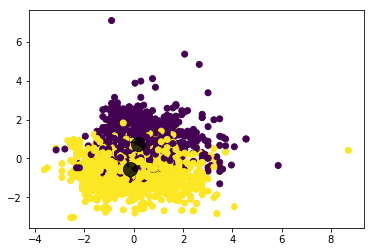

In [105]:
kmeans = KMeans(n_clusters=2, random_state=3123256995)
labels = kmeans.fit_predict(data_kmeans)
centroids = kmeans.cluster_centers_


standarized_data = pd.DataFrame(data_kmeans, columns=data.columns)

#colormap = np.array(['green', 'red', 'lime', 'black', 'yellow', 'purple', 'blue'])
#plt.scatter(x=data['A'], y=data['T'], c=colormap[labels])


plt.scatter(x=standarized_data['A'], y=standarized_data['T'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.8);

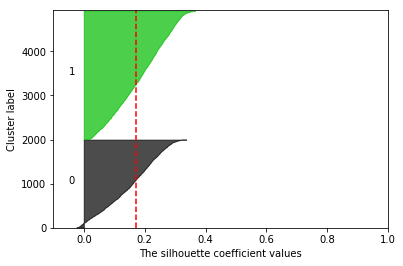

In [106]:
n_clusters = 2
plt.xlim([-0.1, 1])
plt.ylim([0, len(data) + (n_clusters + 1) * 10])

silhouette_avg_plot = silhouette_avg_array[n_clusters-2]
silhouette_sample_plot = silhouette_sample_array[n_clusters-2]

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_sample_plot[silhouette_labels_array[n_clusters-2] == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg_plot, color="red", linestyle="--")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()

In [107]:
# Generate scatter plots between each variable pair
# for pair in itertools.combinations(data.columns,2):
#     print(pair)
#     plt.scatter(x=standarized_data[pair[0]], y=standarized_data[pair[1]], c=labels)
#     plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.8)
#     plt.show()
#     pass


Silhouette score is used to determine optimal number of clusters which is in our case 2. This metric shows how far sample is from neighboring clusters, it has range from -1 to 1. Zere means sample is near decision boundary and negative value means that sample is possibly wrongly classified.

# Question 9

Dataset is properly cleaned, it contains no **NaN** or **null** values.<br>
There is some colinearity between variables (D,R and L).
PCA analysis showed that first 4 components contain 52% of variance, last 2 components have only 5% and they probably could be discarded to reduce dimensions of dataset.<br>

K-means clustering on dataset with silhouette analysis showed that data can be clustered in 2 clusters (using silhouette score to determine correct number of clusters).